In [39]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as stats

# Load and plot the single cell qPCR data

In [40]:
# get the data
import pods, pandas as pd
data = pods.datasets.singlecell()
genes = data['Y']
labels = data['labels']
label_dict = dict(((i,l) for i,l in enumerate(labels)))
#print label_dict
N = genes.shape[0]
G = genes.shape[1]
genes.describe()

,Actb,Ahcy,Aqp3,Atp12a,Bmp4,Cdx2,Creb312,Cebpa,Dab2,DppaI,...,Sox2,Sall4,Sox17,Snail,Sox13,Tcfap2a,Tcfap2c,Tcf23,Utf1,Tspan8
count,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,...,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02
mean,2.089245e-08,2.400458e-08,3.011442e-08,2.009153e-08,1.416476e-08,2.661327e-08,1.828375e-08,2.329519e-08,2.993135e-08,2.077803e-08,...,2.180778e-08,2.146453e-08,2.077803e-08,2.585812e-08,2.473684e-08,2.670481e-08,2.009153e-08,2.231121e-08,2.263158e-08,2.606407e-08
std,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,...,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00
min,-2.997659e+00,-2.140030e+00,-1.768643e+00,-2.355953e+00,-4.420191e+00,-1.972546e+00,-2.493296e+00,-2.290915e+00,-1.641875e+00,-1.755517e+00,...,-2.246728e+00,-2.015028e+00,-2.960914e+00,-1.964500e+00,-2.033562e+00,-1.886886e+00,-2.238215e+00,-2.089612e+00,-1.825355e+00,-2.035440e+00
25%,-7.169942e-01,-7.796685e-01,-7.171038e-01,-9.337937e-01,-2.516838e-01,-6.446426e-01,-7.717112e-01,-8.545864e-01,-6.703301e-01,-1.018770e+00,...,-7.734272e-01,-9.343944e-01,-6.515803e-01,-7.255418e-01,-7.276985e-01,-8.376303e-01,-9.886838e-01,-9.197137e-01,-9.236930e-01,-7.673579e-01
50%,9.227372e-02,-1.782182e-01,-1.842611e-01,2.928931e-01,2.146358e-01,-1.353097e-01,2.772327e-01,-6.806050e-02,-2.415102e-01,1.097815e-01,...,7.709900e-03,8.293864e-02,-3.701860e-02,-1.972392e-01,-1.336842e-01,-2.656403e-01,2.828122e-01,-1.836380e-02,-1.127644e-01,-2.462695e-01
75%,6.808323e-01,6.245760e-01,3.312916e-01,8.234601e-01,6.738631e-01,4.854397e-01,8.213037e-01,9.125241e-01,4.854736e-01,9.259312e-01,...,8.608111e-01,8.312436e-01,6.177259e-01,1.082358e+00,5.329677e-01,9.967453e-01,8.099583e-01,1.022974e+00,8.257577e-01,6.422915e-01
max,2.490650e+00,3.564713e+00,2.627702e+00,1.687127e+00,1.569268e+00,3.427747e+00,1.826346e+00,1.729923e+00,2.780331e+00,1.671790e+00,...,1.709987e+00,4.489121e+00,3.565258e+00,1.655467e+00,2.231074e+00,2.104293e+00,4.187598e+00,1.808619e+00,2.208022e+00,2.270316e+00


In [41]:
D = genes.shape[1]
N = genes.shape[0]
stageCell = np.zeros(N)
stageN = np.zeros(N)
for i,l in enumerate(labels):
    stageCell[i] = int(l[:2])
    stageN[i] = np.log2(stageCell[i]) + 1
    
captureTimes=stageCell[:,None]

In [195]:
stageCell

array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   2.,   2.,
         2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   2.,   2.,   2.,   2.,   2.,   4.,   4.,   4.,   4.,   4.,
         4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,
         4.,   4.,   4.,   4.,   4.,   4.,   4.,   8.,   8.,   8.,   8.,
         8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,
         8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,
         8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,
         8.,   8.,   8.,   8.,   8.,   8.,  16.,  16.,  16.,  16.,  16.,
        16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,
        16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,
        16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,
        16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,  16.,
        16.,  16.,  16.,  16.,  16.,  16.,  16.,  1

# GPFlow 

In [42]:
import GPflow
class GPLVM(GPflow.gpr.GPR):
    def __init__(self, X, Y, kern, mean_function):
        GPflow.gpr.GPR.__init__(self, X, Y, kern, mean_function)
        self.X = GPflow.param.Param(self.X)


In [192]:
T=genes.values

idxEarly = np.logical_or(np.logical_or(np.logical_or(np.logical_or(captureTimes[:,0] == 1,captureTimes[:,0] == 2),\
        captureTimes[:,0] == 4),captureTimes[:,0] == 8),captureTimes[:,0] == 16)

idxEarly = np.array(range(T.shape[0]))

Tearly = T[idxEarly,:]
labelsEarly = labels[idxEarly]
stageNEarly = stageN[idxEarly]
Nearly = Tearly.shape[0]
print Tearly.shape

(437, 48)


In [193]:
# linear GPLVM
m = GPLVM(np.random.randn(Nearly, 2), Tearly, GPflow.kernels.Linear(2), mean_function=GPflow.mean_functions.Constant(np.zeros(D)))

m.likelihood.variance = 0.1
m.likelihood.variance.fixed = True

# Set the prior
muPrior = np.vstack([stageNEarly, np.zeros(Nearly)]).T
#muPrior = np.vstack([np.zeros(Nearly), np.zeros(Nearly)]).T


varPrior = np.vstack([0.5*np.ones(Nearly), np.ones(Nearly)]).T

m.X.prior = GPflow.priors.Gaussian(muPrior,varPrior)

In [194]:
m.optimize()

compiling tensorflow function...
done
optimization terminated, setting model state


      fun: array([ 48391.01884684])
 hess_inv: <923x923 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.73135571e-02,  -2.67092009e-02,  -7.89770336e-04,
        -2.21523775e-02,  -1.64277216e-02,  -1.77405524e-02,
         3.32483437e-03,   2.77555812e-02,  -4.32008243e-03,
        -2.31286744e-03,  -2.07373915e-03,   3.00111181e-02,
         2.82822660e-02,   1.92591916e-02,   6.77849514e-03,
         1.73132622e-02,  -1.40476890e-02,   4.32220114e-02,
        -4.30669201e-04,   2.32572927e-02,   2.28352519e-02,
         2.69502833e-02,  -4.12724242e-03,  -3.14568952e-03,
         1.98380527e-02,   1.05262534e-02,  -3.83621711e-03,
        -6.04132404e-04,  -2.46059653e-02,   4.10321529e-02,
        -2.39123089e-02,  -2.79939723e-02,  -3.27830584e-03,
        -1.66838980e-02,   1.53015545e-02,   7.98624885e-03,
         1.06953654e-02,   5.40254902e-03,   8.00511906e-03,
         2.64876597e-02,   3.69675030e-03,   4.17326565e-02,
         2.14606603e-02,   1.77075431e-

Spearman R=0.92 p=0.00000


Name,values,prior,constriant
kern.variance,[ 0.3635478],None,+ve


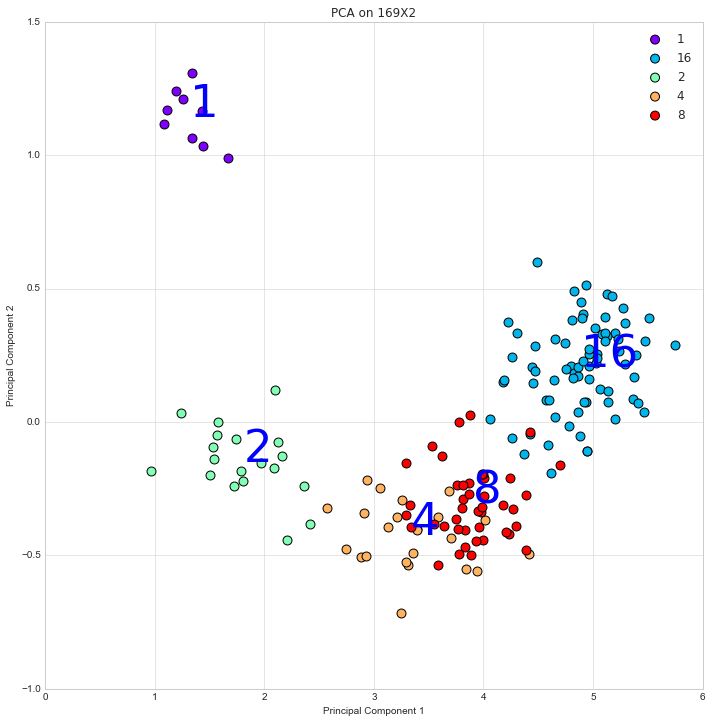

In [46]:
def plot(Y,labelParam):
    # plot PCA on first two principal components
    strLabels = labelParam.values
    uniqueLabels = np.unique(strLabels)
    import matplotlib.cm as cm
    colors = cm.rainbow(np.linspace(0, 1, len(uniqueLabels)))
    Dlatent = 2
    with plt.style.context('seaborn-whitegrid'):
            plt.figure(figsize=(10, 10))
            for lab,c in zip(uniqueLabels,colors):
                y1 = Y[strLabels==lab, 0]
                if(Dlatent == 2):
                    y2 = Y[strLabels==lab, 1]
                else:
                    y2 = y1

                plt.scatter(y1,
                            y2,
                            label=lab,
                            c=c,s=80)
                if(Dlatent == 2):
                    plt.text(np.mean(y1),np.mean(y2),lab, fontsize=45, color='blue')
                else:
                    plt.text(np.max(y1),np.max(y2),lab, fontsize=15, color='blue')
            plt.xlabel('Principal Component 1')
            plt.ylabel('Principal Component 2')
            plt.legend(loc='upper right')
            plt.tight_layout()
            plt.title('PCA on %gX%g'%Y.shape)
    
plot(m.X._array, labelsEarly)
print 'Spearman R=%.2f p=%.5f'%stats.spearmanr(stageNEarly, m.X._array[:,0])
m.kern

# Initialisation for hierarchical model
1. PCA to Gene to 2-D - does not need to use capture times. 
1. 2-D to 1-D (t)
1. Plotting smoothing curves per cluster.

In [121]:
import GPflow
import tensorflow as tf
class Deep(GPflow.model.Model):
    def __init__(self, Y, k1, k2, T0, X0, mf1=None, mf2=None):
        GPflow.model.Model.__init__(self)
        self.k1 = k1
        self.k2 = k2
        self.T = GPflow.param.Param(T0)
        self.X = GPflow.param.Param(X0)
        self.Y = Y

        if mf1 is None:
            mf1 = GPflow.mean_functions.Zero()
        if mf2 is None:
            mf2 = GPflow.mean_functions.Zero()
        self.mf1, self.mf2 = mf1, mf2

    def build_likelihood(self):

        # p(X | T)
        K1 = self.k1.K(self.T)
        L1 = tf.cholesky(K1)
        m1 = self.mf1(self.T)
        l = GPflow.densities.multivariate_normal(self.X, m1, L1)

        # p(Y | X, T)
        X_and_T = tf.concat(1, [self.T, self.X])
        K2 = self.k2.K(X_and_T)
        L2 = tf.cholesky(K2)
        m2 = self.mf2(self.T)
        l += GPflow.densities.multivariate_normal(self.Y, m2, L2)

        return l
    
    @GPflow.model.AutoFlow(tf.placeholder(tf.float64, [None, None]))
    def predict_1(self, Xnew):
        
        full_cov = False
        
        Kx = self.k1.K(self.T, Xnew)
        K = self.k1.K(self.T)
        L = tf.cholesky(K)
        A = tf.matrix_triangular_solve(L, Kx, lower=True)
        V = tf.matrix_triangular_solve(L, self.X - self.mf1(self.T), lower=True)
        fmean = tf.matmul(tf.transpose(A), V) + self.mf1(Xnew)
        if full_cov:
            fvar = self.k1.K(Xnew) - tf.matmul(tf.transpose(A), A)
            fvar = tf.tile(tf.expand_dims(fvar, 2), tf.pack([1, 1, tf.shape(self.X)[1]]))
        else:
            fvar = self.k1.Kdiag(Xnew) - tf.reduce_sum(tf.square(A), reduction_indices=0)
            fvar = tf.tile(tf.reshape(fvar, (-1,1)), tf.pack([1, tf.shape(self.X)[1]]))
        return fmean, fvar
        
        

In [178]:
k1 = GPflow.kernels.RBF(1, lengthscales=5) + GPflow.kernels.White(1, variance=0.1)
k2 = GPflow.kernels.Linear(2) + GPflow.kernels.White(2, variance=0.1)

k1.rbf.variance.fixed = True
k1.rbf.lengthscales.fixed = True
k1.white.variance.fixed = True

muPrior = stageNEarly[:,None]
varPrior = 2*np.ones(Nearly)[:,None]

md = Deep(Tearly, k1=k1, k2=k2, T0=m.X._array[:,0:1], X0=m.X._array[:,1:2], mf2=GPflow.mean_functions.Constant(np.zeros(D)))

md.T.prior = GPflow.priors.Gaussian(muPrior,varPrior)

In [184]:
md.optimize(max_iters=1000)

compiling tensorflow function...
done
optimization terminated, setting model state


      fun: array([ 7641.56890969])
 hess_inv: <388x388 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -8.69202986e-02,  -2.16484828e-02,   5.59043704e-03,
         4.63965398e-03,   4.86249955e-03,   5.68188303e-03,
         2.37745240e-03,   3.09689046e-03,   3.58069114e-03,
         3.97994857e-03,   2.32331278e-03,  -4.52025090e-03,
        -2.71653319e-03,   2.25816348e-03,  -6.17940990e-03,
        -6.51951561e-03,  -5.84790857e-03,  -8.54002718e-03,
        -6.31149471e-03,  -7.66557173e-03,  -4.02401800e-03,
        -7.75700155e-03,  -4.88323993e-03,  -9.46056451e-03,
        -4.09430920e-03,  -4.47403331e-03,  -7.26340519e-03,
        -5.21974851e-03,  -2.49813245e-03,  -4.51315433e-03,
        -1.59800369e-03,   2.24972804e-03,  -1.80290146e-03,
        -8.08201102e-04,   2.63397917e-03,  -2.58816129e-03,
         1.80416792e-04,   1.34584875e-04,   8.66435296e-04,
         2.24247766e-03,   2.04949664e-03,   9.48532822e-04,
         2.12296135e-03,   5.96989143e-0

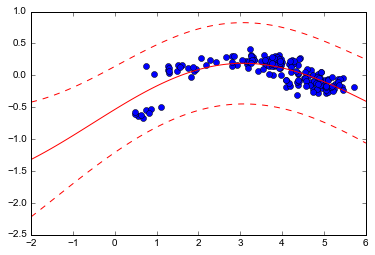

In [185]:
plt.plot(md.T._array, md.X._array, 'o')
Xnew = np.linspace(-2,6,100)[:,None]
md._needs_recompile = True
[mp,vp] = md.predict_1(Xnew)
plt.plot(Xnew[:,0], mp, '-r' )
plt.plot(Xnew[:,0], mp+2*np.sqrt(vp), '--r' )

plt.plot(Xnew[:,0], mp-2*np.sqrt(vp), '--r' )

In [186]:
md.k1

Name,values,prior,constriant
k1.white.variance,[ 0.1],None,[FIXED]
k1.rbf.variance,[ 1.],None,[FIXED]
k1.rbf.lengthscales,[ 5.],None,[FIXED]


In [187]:
md.k2

Name,values,prior,constriant
k2.white.variance,[ 0.34041447],None,+ve
k2.linear.variance,[ 0.96581501],None,+ve


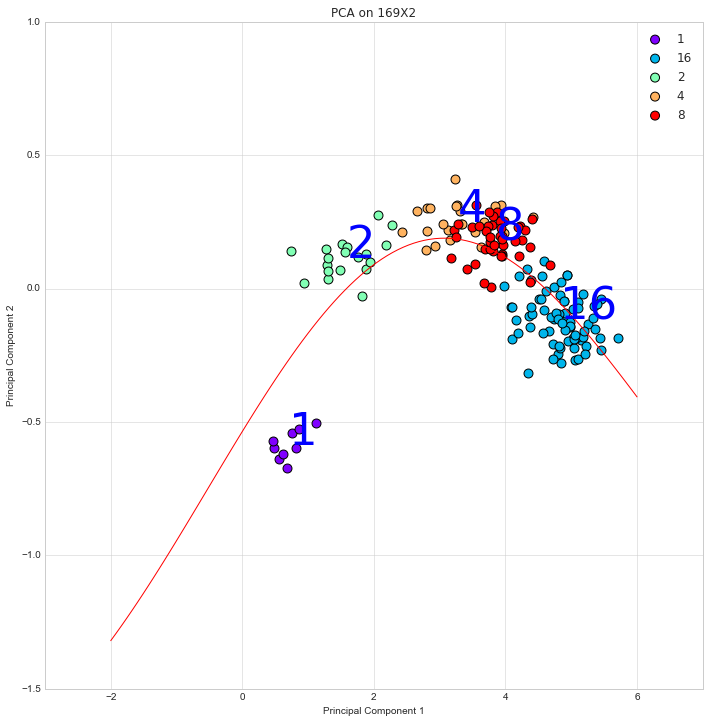

In [188]:
plot(np.hstack([md.T._array,md.X._array]), labelsEarly)

plt.plot(Xnew[:,0], mp, '-r' )
#plt.plot(Xnew[:,0], mp+2*np.sqrt(vp), '--r' )

#plt.plot(Xnew[:,0], mp-2*np.sqrt(vp), '--r' )

In [189]:
k1.rbf.variance.fixed = False
k1.rbf.lengthscales.fixed = False
k1.white.variance.fixed = False
md.optimize(max_iters=100)

compiling tensorflow function...
done
optimization terminated, setting model state


      fun: array([ 6168.75485373])
 hess_inv: <391x391 LbfgsInvHessProduct with dtype=float64>
      jac: array([  4.01059730e+01,   9.54974914e-01,  -5.77869990e+00,
         2.42164462e+02,  -4.28086304e+00,   2.24283629e+05,
         6.91766874e+04,  -1.11793406e+04,  -1.00563918e+05,
        -1.54925827e+04,   1.32466008e+05,   1.62969464e+03,
        -8.98952495e+04,  -2.47388362e+04,   1.11073578e+05,
         3.21925550e+04,   4.90287460e+03,  -5.47280694e+03,
         5.96968111e+04,  -3.76567598e+04,  -1.52033393e+05,
        -3.36626626e+04,   2.71190542e+04,   3.02722995e+02,
        -1.04806155e+05,  -6.12847364e+04,  -8.08037511e+04,
         4.87006004e+04,  -4.44306095e+04,  -1.10426523e+04,
        -4.12802983e+03,   6.56012417e+04,   2.02761619e+04,
        -2.40152812e+03,   3.48236338e+03,   3.96491286e+03,
        -1.03152450e+04,   1.23702165e+03,  -9.01542124e+03,
        -3.58028435e+03,  -5.16239972e+03,  -4.48298000e+03,
        -1.12765883e+04,  -2.07947162e+0

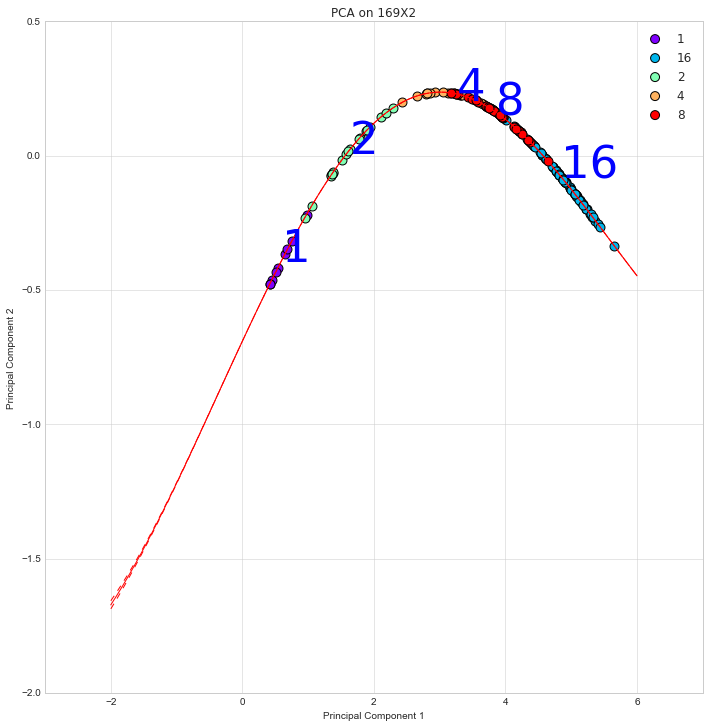

In [190]:
plot(np.hstack([md.T._array,md.X._array]), labelsEarly)

md._needs_recompile = True
[mp,vp] = md.predict_1(Xnew)

plt.plot(Xnew[:,0], mp, '-r' )
plt.plot(Xnew[:,0], mp+2*np.sqrt(vp), '--r' )
plt.plot(Xnew[:,0], mp-2*np.sqrt(vp), '--r' )

In [191]:
md.k1

Name,values,prior,constriant
k1.white.variance,[ 3.18933768e-11],None,+ve
k1.rbf.variance,[ 1.54676202],None,+ve
k1.rbf.lengthscales,[ 3.86459091],None,+ve


(0.001, 0.003)

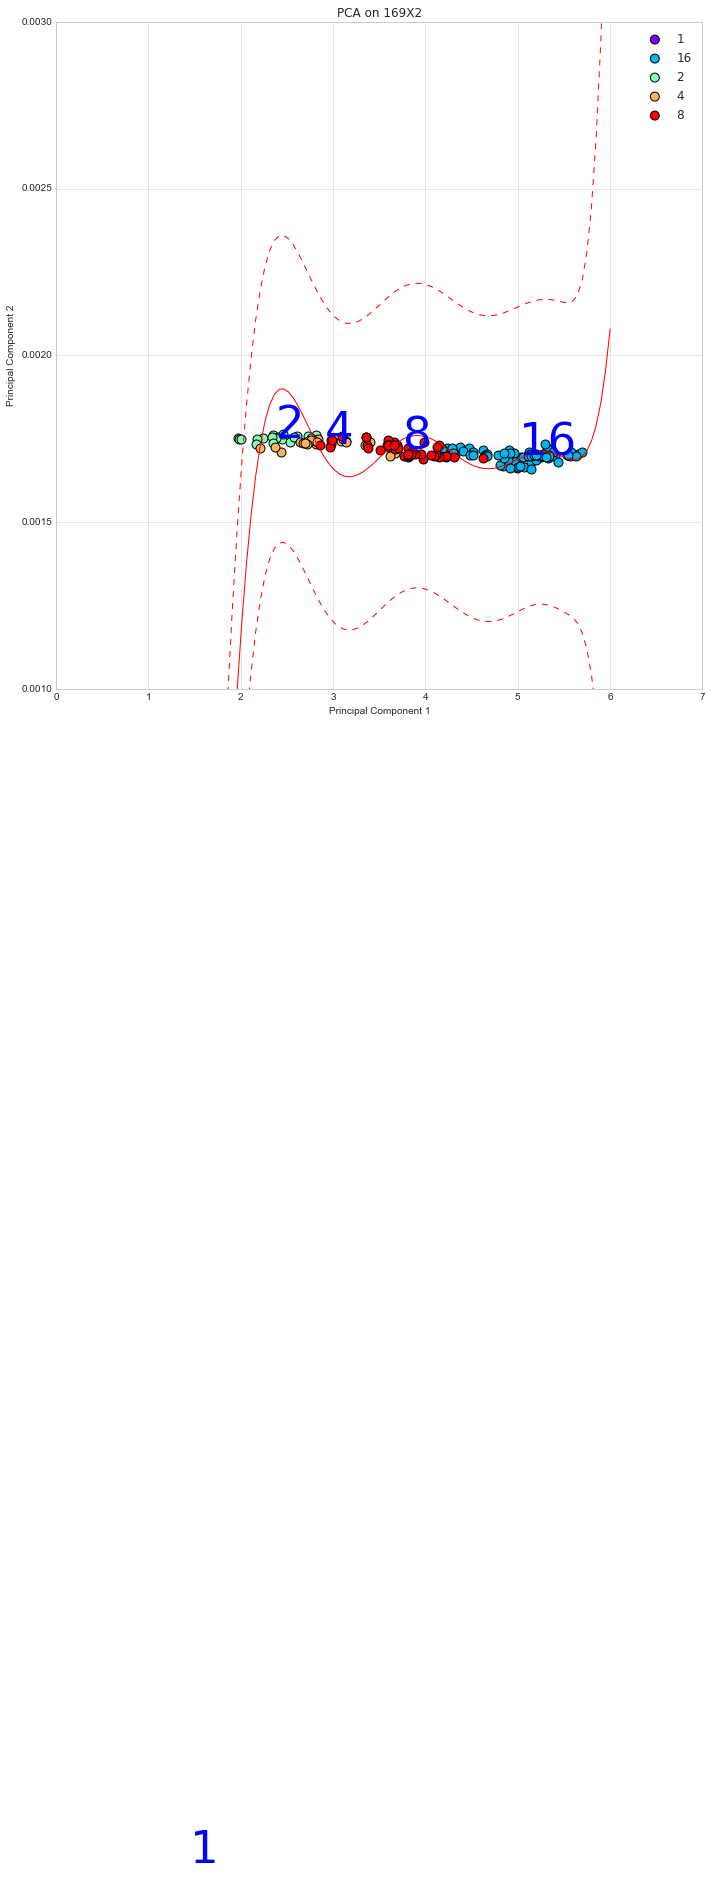

In [157]:
plot(np.hstack([md.T._array,md.X._array]), labelsEarly)
plt.plot(Xnew[:,0], mp, '-r' )
plt.plot(Xnew[:,0], mp+2*np.sqrt(vp), '--r' )
plt.plot(Xnew[:,0], mp-2*np.sqrt(vp), '--r' )
plt.ylim(0.001, 0.003)

In [159]:
md.k1

Name,values,prior,constriant
k1.white.variance,[ 5.06858449e-08],None,+ve
k1.rbf.variance,[ 0.70725611],None,+ve
k1.rbf.lengthscales,[ 2.17580009],None,+ve
